<a href="https://colab.research.google.com/github/MDRobiulhassan/Machine-Learning-Course/blob/main/Student_Perfomence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('/content/drive/MyDrive/University/7th Semester/MLL/colab/student_lifestyle_100k.csv')

In [56]:
df.head()

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,1001,22,Female,Science,3.50,7.3,3.3,3.4,114,5,False
1,1002,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,False
2,1003,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,False
3,1004,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,False
4,1005,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,False


In [57]:
df = df.drop('Student_ID', axis=1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 100000 non-null  int64  
 1   Gender              100000 non-null  object 
 2   Department          100000 non-null  object 
 3   CGPA                100000 non-null  float64
 4   Sleep_Duration      100000 non-null  float64
 5   Study_Hours         100000 non-null  float64
 6   Social_Media_Hours  100000 non-null  float64
 7   Physical_Activity   100000 non-null  int64  
 8   Stress_Level        100000 non-null  int64  
 9   Depression          100000 non-null  bool   
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 7.0+ MB


In [59]:
df.shape

(100000, 10)

In [60]:
df.isnull().sum()

,0
Age,0
Gender,0
Department,0
CGPA,0
Sleep_Duration,0
Study_Hours,0
Social_Media_Hours,0
Physical_Activity,0
Stress_Level,0
Depression,0


In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df.describe()

,Age,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.009010,2.898316,6.996425,4.509517,3.503288,74.353180,4.131660
std,2.000382,0.532240,1.498682,1.976076,1.486852,43.366963,1.424151
min,18.000000,1.560000,3.000000,0.000000,0.000000,0.000000,2.000000
25%,19.000000,2.450000,6.000000,3.200000,2.500000,37.000000,3.000000
50%,21.000000,2.900000,7.000000,4.500000,3.500000,74.000000,4.000000
75%,23.000000,3.350000,8.000000,5.800000,4.500000,112.000000,5.000000
max,24.000000,4.000000,12.000000,12.800000,10.000000,149.000000,10.000000


In [63]:
import pandas as pd

outlier_summary = []

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()

    if outlier_count > 0:
        outlier_summary.append({
            'feature': col,
            'Q1': Q1,
            'Q3': Q3,
            'lower_bound': lower,
            'upper_bound': upper,
            'outlier_count': outlier_count
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,Sleep_Duration,6.0,8.0,3.0,11.0,369
1,Study_Hours,3.2,5.8,-0.7,9.7,432
2,Social_Media_Hours,2.5,4.5,-0.5,7.5,328
3,Stress_Level,3.0,5.0,0.0,8.0,478


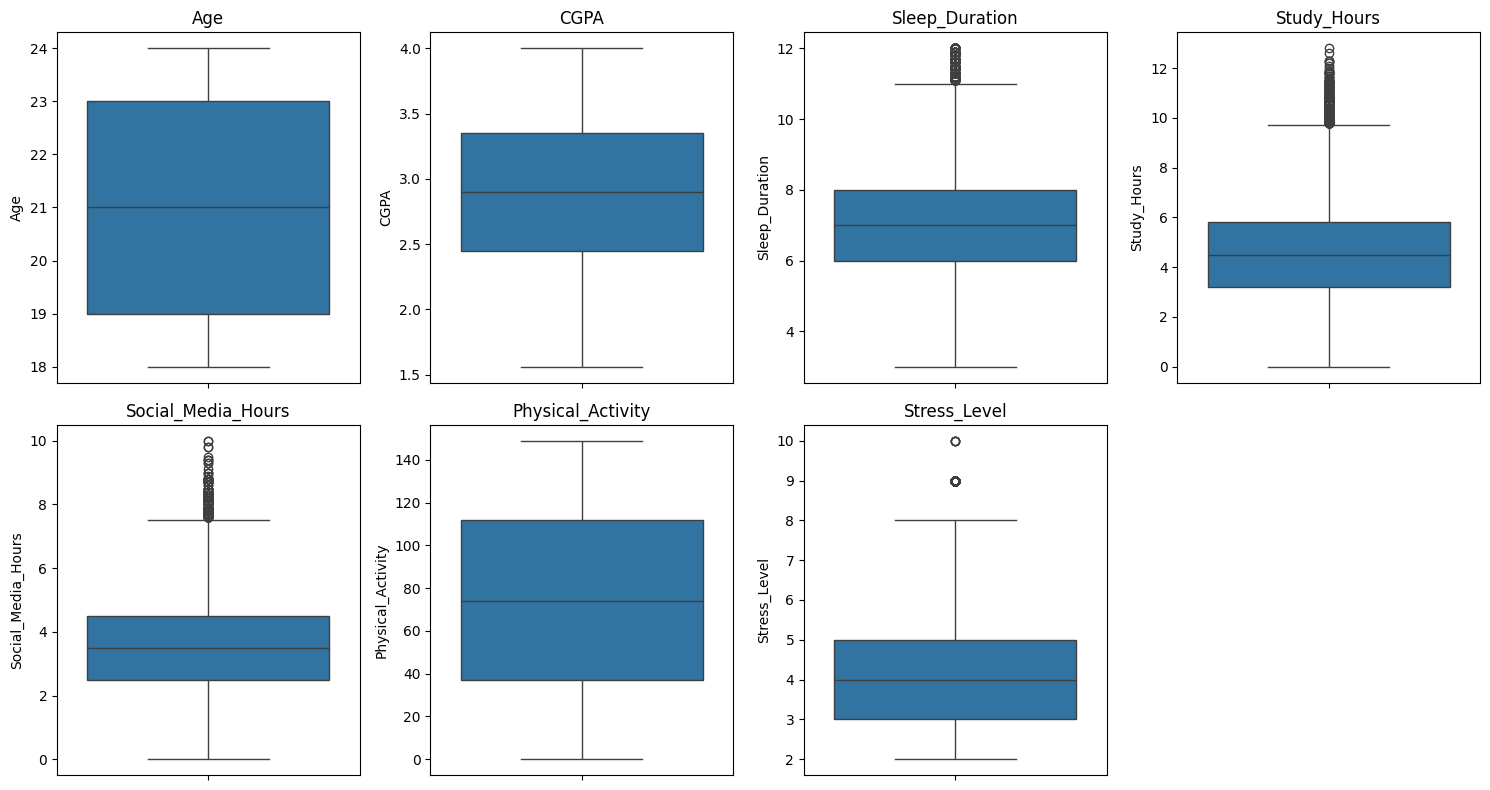

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set figure size
plt.figure(figsize=(15, 8))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [65]:
# Columns with detected outliers
outlier_cols = ['Sleep_Duration', 'Study_Hours', 'Social_Media_Hours', 'Stress_Level']

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Clip values outside bounds
    df[col] = df[col].clip(lower, upper)

In [66]:

capped_summary = []

for feature in numeric_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    capped_summary.append([feature, Q1, Q3, lower, upper, 0])

capped_df = pd.DataFrame(capped_summary, columns=['feature','Q1','Q3','lower_bound','upper_bound','outlier_count'])

capped_df

,feature,Q1,Q3,lower_bound,upper_bound,outlier_count
0,Age,19.00,23.00,13.0,29.0,0
1,CGPA,2.45,3.35,1.1,4.7,0
2,Sleep_Duration,6.00,8.00,3.0,11.0,0
3,Study_Hours,3.20,5.80,-0.7,9.7,0
4,Social_Media_Hours,2.50,4.50,-0.5,7.5,0
5,Physical_Activity,37.00,112.00,-75.5,224.5,0
6,Stress_Level,3.00,5.00,0.0,8.0,0


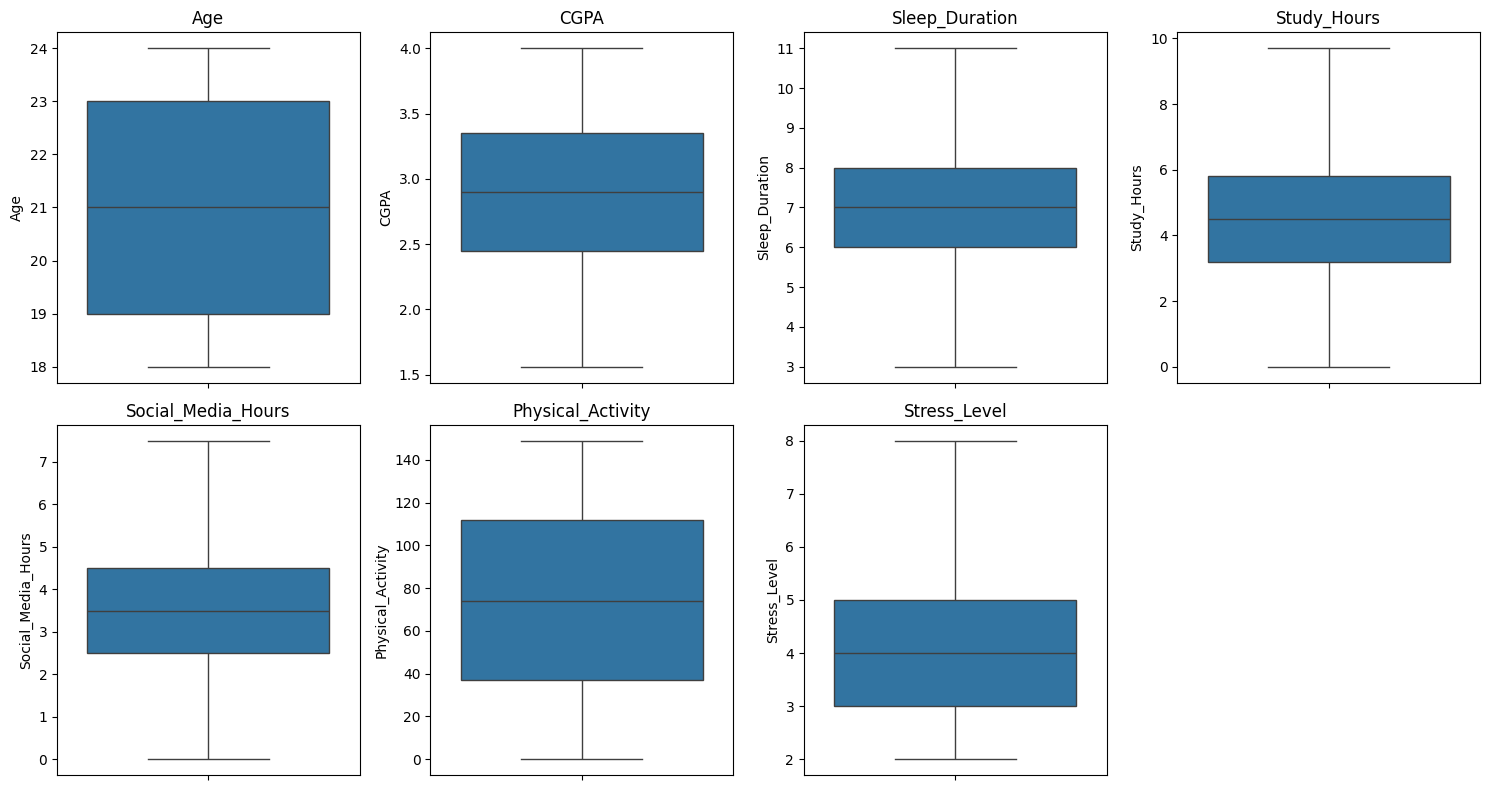

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Set figure size
plt.figure(figsize=(15, 8))

# Loop over numeric columns and plot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [68]:
df.describe()

,Age,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.009010,2.898316,6.994622,4.506513,3.501589,74.353180,4.126840
std,2.000382,0.532240,1.493435,1.967261,1.481769,43.366963,1.409252
min,18.000000,1.560000,3.000000,0.000000,0.000000,0.000000,2.000000
25%,19.000000,2.450000,6.000000,3.200000,2.500000,37.000000,3.000000
50%,21.000000,2.900000,7.000000,4.500000,3.500000,74.000000,4.000000
75%,23.000000,3.350000,8.000000,5.800000,4.500000,112.000000,5.000000
max,24.000000,4.000000,11.000000,9.700000,7.500000,149.000000,8.000000


In [69]:
# Make a copy to avoid modifying original df
corr_df = df.copy()

# Convert boolean target to numeric
corr_df['Depression'] = corr_df['Depression'].astype(int)

# Keep only numeric columns
corr_df = corr_df.select_dtypes(include='number')
corr_matrix = corr_df.corr()
corr_matrix

,Age,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
Age,1.000000,0.003248,0.001276,-0.003886,-0.000418,-0.003676,0.003153,-0.007722
CGPA,0.003248,1.000000,0.015313,0.099262,-0.088096,0.004766,-0.012283,-0.178971
Sleep_Duration,0.001276,0.015313,1.000000,0.002681,-0.002903,0.003217,-0.278899,-0.057690
Study_Hours,-0.003886,0.099262,0.002681,1.000000,0.005376,-0.001976,0.007260,-0.015969
Social_Media_Hours,-0.000418,-0.088096,-0.002903,0.005376,1.000000,-0.004968,0.001942,0.016951
Physical_Activity,-0.003676,0.004766,0.003217,-0.001976,-0.004968,1.000000,-0.296219,-0.013935
Stress_Level,0.003153,-0.012283,-0.278899,0.007260,0.001942,-0.296219,1.000000,0.072906
Depression,-0.007722,-0.178971,-0.057690,-0.015969,0.016951,-0.013935,0.072906,1.000000


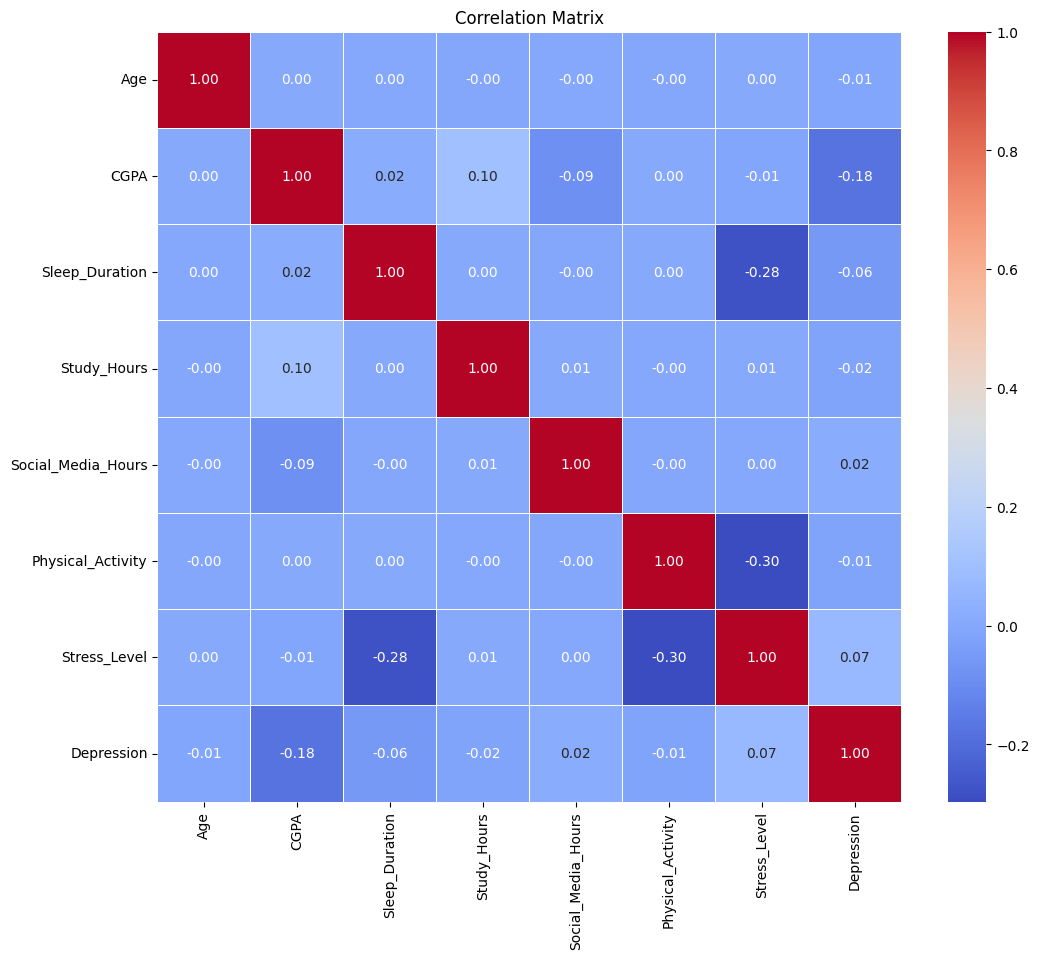

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix")
plt.show()

In [71]:
import pandas as pd

# Ensure Depression is numeric
df['Depression'] = df['Depression'].astype(int)

# Select features (exclude ID)
features = [
    'Age', 'CGPA', 'Sleep_Duration', 'Study_Hours',
    'Social_Media_Hours', 'Physical_Activity', 'Stress_Level'
]

summary_table = df.groupby('Depression')[features].mean().T
summary_table.columns = ['No_Depression (0)', 'Depression (1)']

summary_table

,No_Depression (0),Depression (1)
Age,21.014176,20.962830
CGPA,2.930177,2.613530
Sleep_Duration,7.023439,6.737040
Study_Hours,4.517021,4.412592
Social_Media_Hours,3.493188,3.576685
Physical_Activity,74.555305,72.546512
Stress_Level,4.092475,4.434009


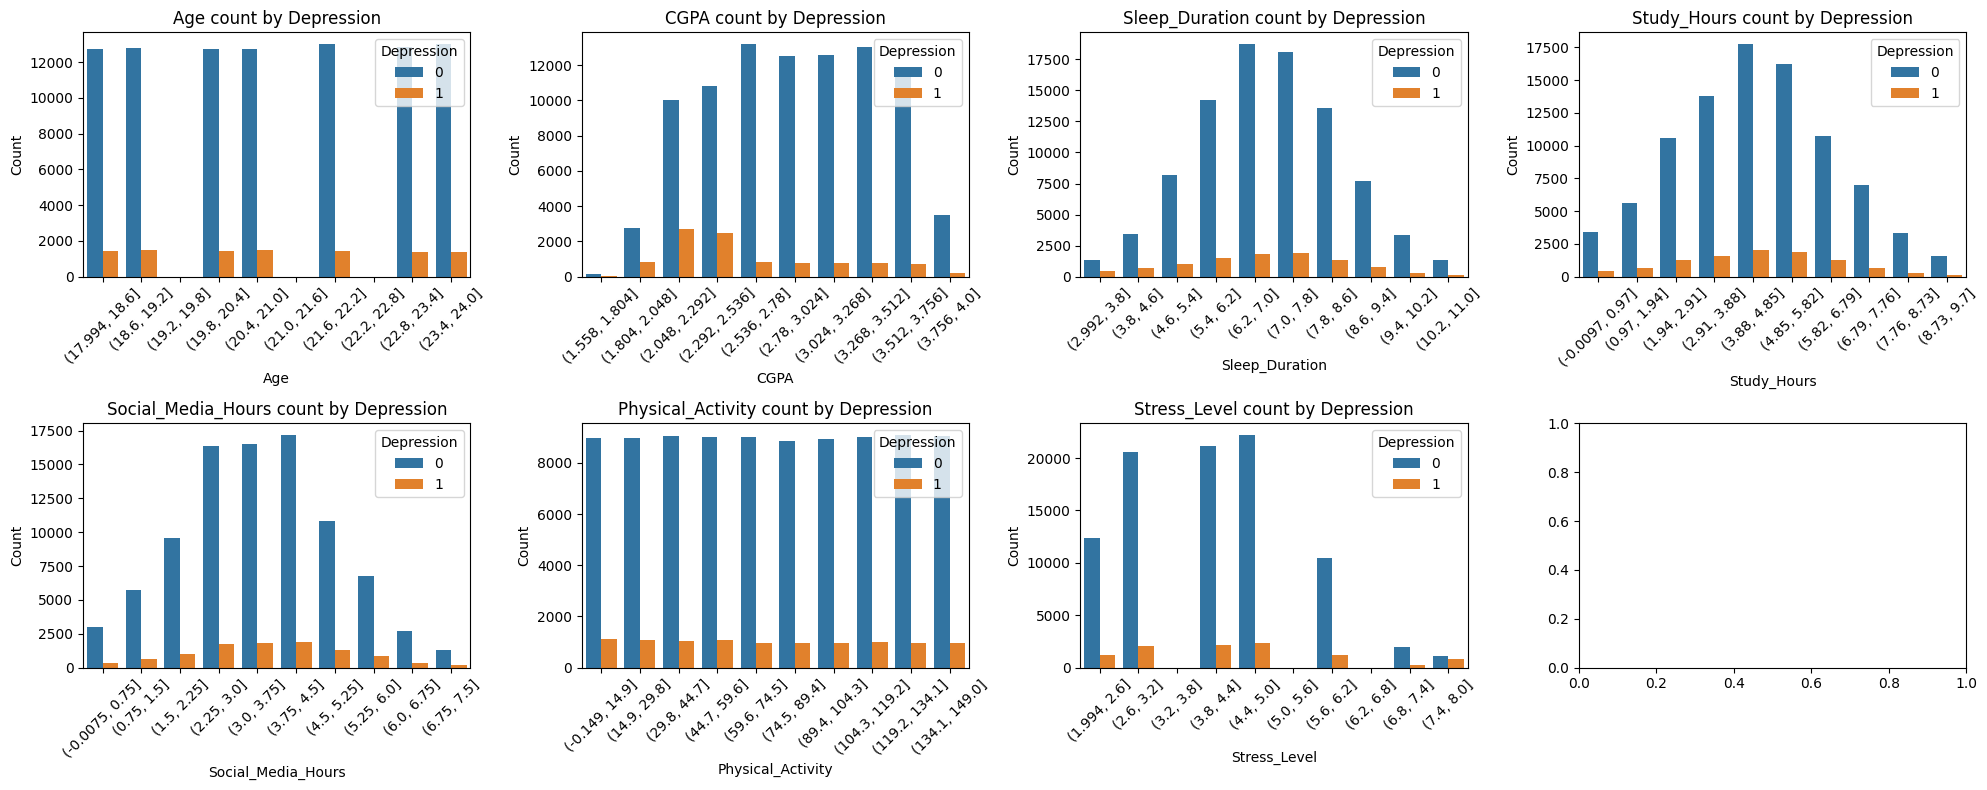

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features = [
    'Age', 'CGPA', 'Sleep_Duration', 'Study_Hours',
    'Social_Media_Hours', 'Physical_Activity',
    'Stress_Level'
]

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(features):
    # Bin numeric features into 10 equal-width bins for countplot
    df[f'{col}_binned'] = pd.cut(df[col], bins=10)

    sns.countplot(
        x=f'{col}_binned',
        hue='Depression',
        data=df,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} count by Depression")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

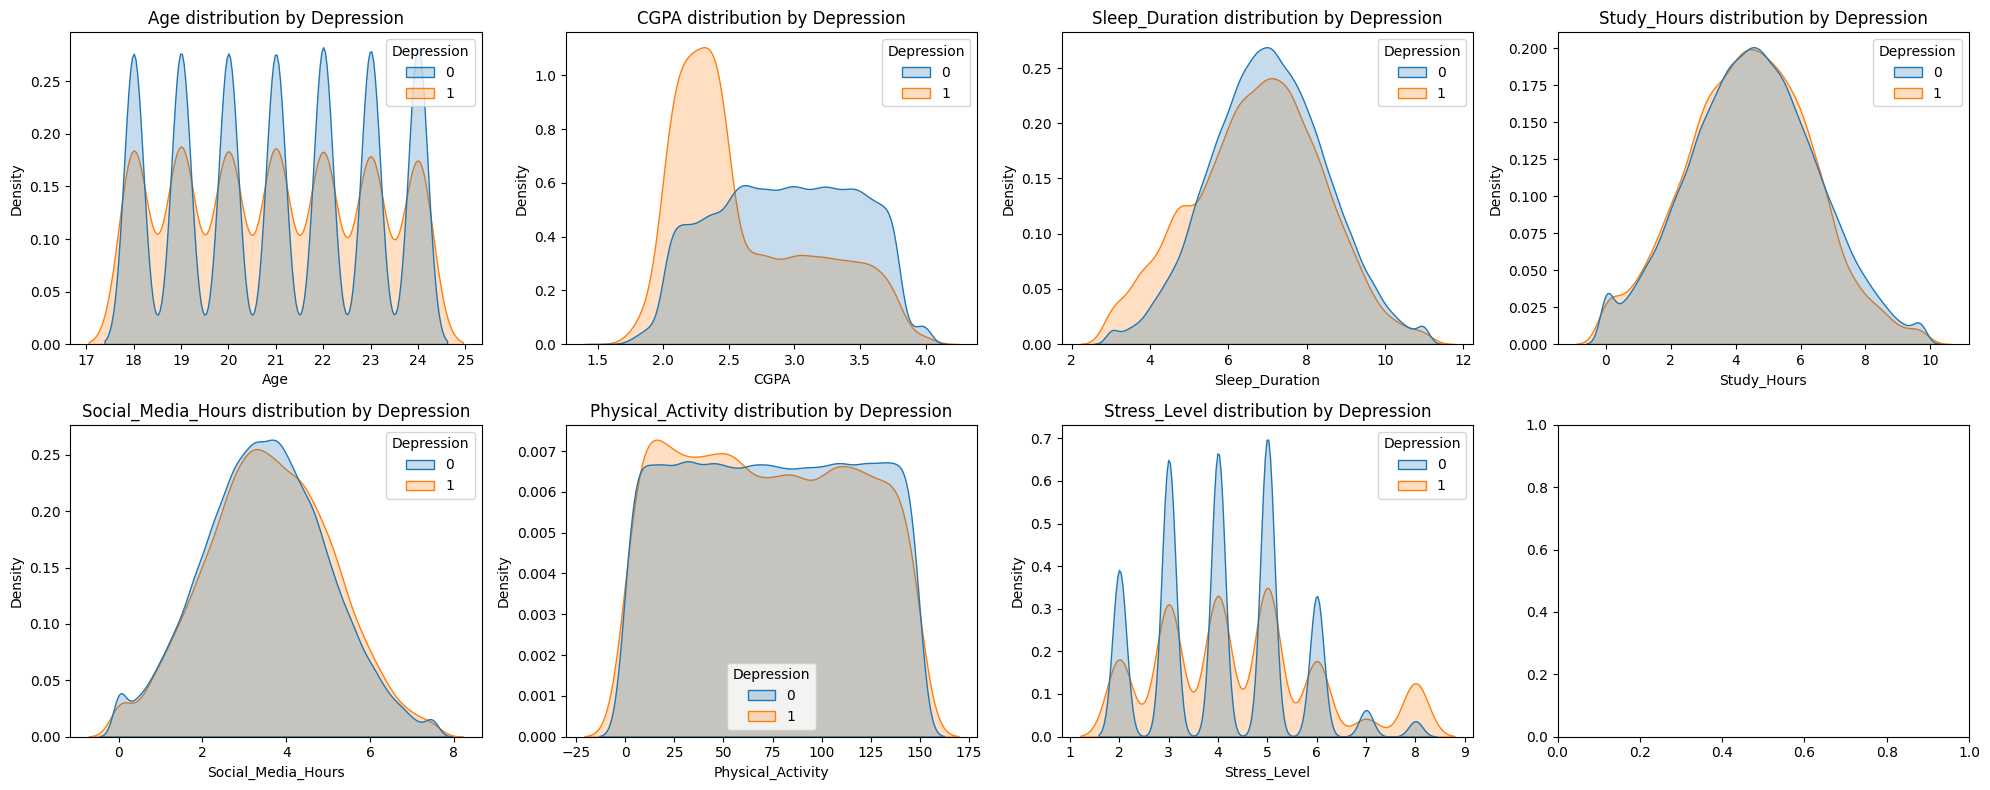

In [73]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(
        data=df,
        x=col,
        hue='Depression',
        fill=True,
        common_norm=False,
        ax=axes[i]
    )
    axes[i].set_title(f"{col} distribution by Depression")

plt.tight_layout()
plt.show()

In [74]:
binned_cols = [col for col in df.columns if '_binned' in col]
df.drop(columns=binned_cols, inplace=True)

In [75]:
df.dtypes

,0
Age,int64
Gender,object
Department,object
CGPA,float64
Sleep_Duration,float64
Study_Hours,float64
Social_Media_Hours,float64
Physical_Activity,int64
Stress_Level,int64
Depression,int64


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 100000 non-null  int64  
 1   Gender              100000 non-null  object 
 2   Department          100000 non-null  object 
 3   CGPA                100000 non-null  float64
 4   Sleep_Duration      100000 non-null  float64
 5   Study_Hours         100000 non-null  float64
 6   Social_Media_Hours  100000 non-null  float64
 7   Physical_Activity   100000 non-null  int64  
 8   Stress_Level        100000 non-null  int64  
 9   Depression          100000 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 7.6+ MB


In [77]:
import pandas as pd

# Encode Gender (binary) → Label Encoding
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Encode Department (more than 2 categories) → One-Hot Encoding
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

# Check result
df.head()

,Age,Gender,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression,Department_Business,Department_Engineering,Department_Medical,Department_Science
0,22,1,3.50,7.3,3.3,3.4,114,5,0,False,False,False,True
1,20,0,2.72,5.5,7.2,6.0,142,2,0,False,True,False,False
2,20,0,3.01,5.4,2.3,1.8,137,3,0,False,False,True,False
3,21,0,3.63,8.1,2.0,4.6,130,3,0,False,True,False,False
4,19,0,3.14,6.8,2.6,4.3,4,6,0,False,False,False,False


In [78]:
# convert all boolean columns to int
bool_cols = df.select_dtypes('bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Check
df.head()

,Age,Gender,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression,Department_Business,Department_Engineering,Department_Medical,Department_Science
0,22,1,3.50,7.3,3.3,3.4,114,5,0,0,0,0,1
1,20,0,2.72,5.5,7.2,6.0,142,2,0,0,1,0,0
2,20,0,3.01,5.4,2.3,1.8,137,3,0,0,0,1,0
3,21,0,3.63,8.1,2.0,4.6,130,3,0,0,1,0,0
4,19,0,3.14,6.8,2.6,4.3,4,6,0,0,0,0,0


In [79]:
df['Depression'].value_counts()

,count
Depression,
0,89938
1,10062


In [80]:
df['Depression'].value_counts(normalize=True) * 100

,proportion
Depression,
0,89.938
1,10.062


In [81]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

In [82]:
X = df.drop('Depression', axis=1)
y = df['Depression']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [84]:
print("Before SMOTE:")
print(y_train.value_counts())

Before SMOTE:
Depression
0    71950
1     8050
Name: count, dtype: int64


In [85]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [86]:
print("\nAfter SMOTE:")
print(y_train_res.value_counts())


After SMOTE:
Depression
0    71950
1    71950
Name: count, dtype: int64


In [87]:
print("Original X_train shape:", X_train.shape)
print("Original y_train shape:", y_train.shape)
print("Test set X_test shape:", X_test.shape)
print("Test set y_test shape:", y_test.shape)

Original X_train shape: (80000, 12)
Original y_train shape: (80000,)
Test set X_test shape: (20000, 12)
Test set y_test shape: (20000,)


In [88]:
print("\nAfter SMOTE:")
print("Resampled X_train shape:", X_train_res.shape)
print("Resampled y_train shape:", y_train_res.shape)


After SMOTE:
Resampled X_train shape: (143900, 12)
Resampled y_train shape: (143900,)


In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [90]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [91]:
y_pred = model.predict(X_test)

In [92]:
print("Predicted values (first 20):")
print(y_pred[:20])

Predicted values (first 20):
[1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1]


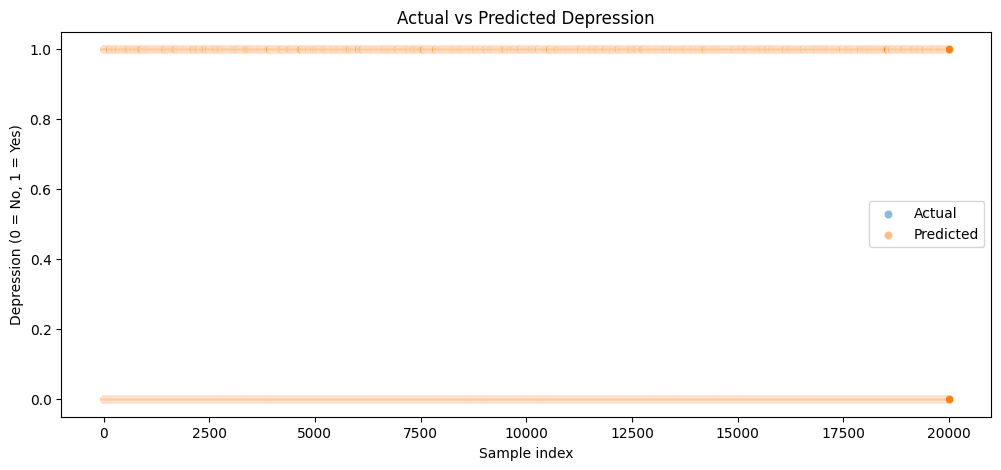

In [93]:
plt.figure(figsize=(12, 5))
df_plot = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
sns.scatterplot(x=range(len(y_test)), y='Actual', data=df_plot, label='Actual', alpha=0.5)
sns.scatterplot(x=range(len(y_test)), y='Predicted', data=df_plot, label='Predicted', alpha=0.5)
plt.title('Actual vs Predicted Depression')
plt.xlabel('Sample index')
plt.ylabel('Depression (0 = No, 1 = Yes)')
plt.legend()
plt.show()

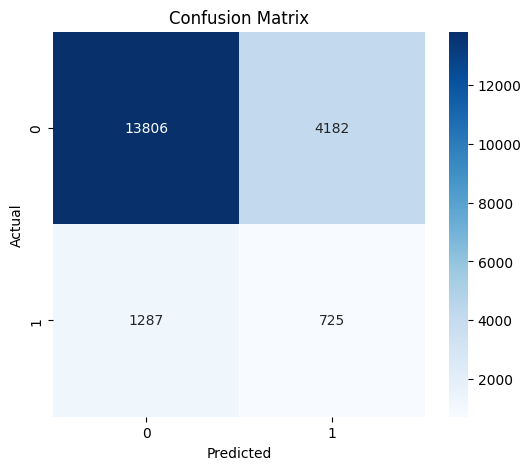

In [94]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [95]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83     17988
           1       0.15      0.36      0.21      2012

    accuracy                           0.73     20000
   macro avg       0.53      0.56      0.52     20000
weighted avg       0.84      0.73      0.77     20000



In [96]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

# F1-score
f1 = f1_score(y_test, y_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")


Accuracy : 0.7266
Precision: 0.1477
Recall   : 0.3603
F1-score : 0.2096
